# Calculation of Fractal Dimension

## What is a Fractal?

A **Fractal** is a geometric shape containing **arbitrarily fine details**.

Many Fractals exhibit self-similarity, where one part of the Fractal may look like the whole shape, scaled down.

In [ ]:
!pip install cartopy

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/b/b8/Self-Similarity-Zoom.gif')


## The Sierpinski triangle

A classic example of a self-similar Fractal is the **Sierpinski triangle**.
Its construction is recursive, and goes as follows:

1. Take an equilateral triangle.
2. From it, remove an upside-down triangle a quarter its size.
3. Repeat for each of the smaller triangles left over.

Let us try to follow this infinite recursion, up to some finite level, with code:

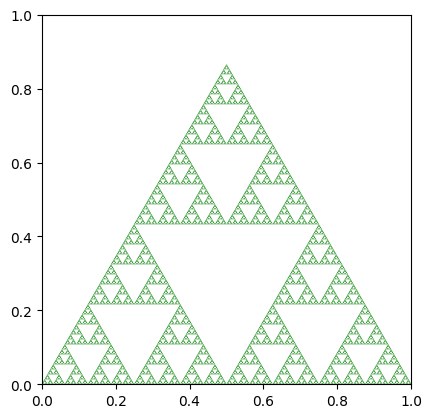

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
plt.rcParams['figure.dpi'] = 100

plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')


# Define equilateral triangle, hole corner

UNIT_TRIANGLE = np.array([[0, 0], [1, 0], [1/2, sqrt(3)/2]])
hole_vector = np.array([3/4, sqrt(3)/4])

def sierpinski_holes(LIM, lowerleft=np.array([0, 0]), n=0):

  scale = 1/(2**n)

  # Ends the recursion
  if n > LIM:
    return []

  holes = []

  # Defines upside-down triangle hole
  middle_hole = lowerleft + (hole_vector - UNIT_TRIANGLE/2) * scale
  holes.append(middle_hole)

  # Recurses for smaller holes
  for p in UNIT_TRIANGLE:
    holes = holes + sierpinski_holes(LIM, lowerleft + p/2 * scale, n+1)

  return holes


# Draws full-scale triangle
whole_triangle = plt.Polygon(UNIT_TRIANGLE, facecolor="green")
plt.gca().add_patch(whole_triangle)

# Generates holes
holes = sierpinski_holes(7)

# Draws holes
for hole in holes:
  poly = plt.Polygon(hole, facecolor="white")
  plt.gca().add_patch(poly)

plt.show()

## The Koch Curve

Another example of a self-similar Fractal is the **Koch Curve**.
Unlike the Sierpinski triangle, it is made out of line segments, and is constructed with a very simple recursion:

>1. Take a straight line segment.
2. Bend the middle of the segment into a wedge ($\wedge$).
3. Repeat for each of the $4$ smaller segments.

Let us again try to follow this recursion with code.

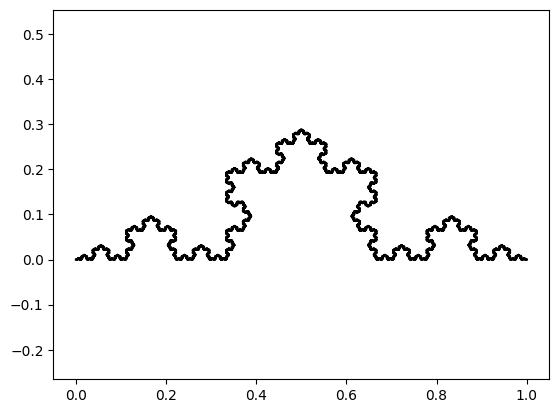

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power as mPow
from math import sqrt
import time
plt.rcParams['figure.dpi'] = 100

# 60 degree rotation
ROTATE = np.array([[1/2, -sqrt(3)/2], [sqrt(3)/2, 1/2]])

# The orientation for the 4 line segments
rotations = [mPow(ROTATE, 0), mPow(ROTATE, 1), mPow(ROTATE, -1), mPow(ROTATE, 0)]


def koch_lines(N, n=0):

  # Base case: straight line
  if (n == N):
    return np.array([[0, 0], [1, 0]])

  points = np.zeros((1, 2))
  end = points[-1]

  # For each of the segments of recursion
  for rot in rotations:

    # Recurses and applies rotation
    segment = koch_lines(N, n+1)/3 @ rot.T

    points = np.concatenate((points, end + segment[1:]))

    # Keeps track of the current end of line
    end = end + segment[-1]

  return points


points = koch_lines(7)

plt.plot(points[:, 0], points[:, 1], color='black')
plt.axis('equal')

plt.show()

## What Dimension is a Fractal?

At first glance, we may look at the way a Fractal is constructed and assume is it of the same dimension as the shapes that lead to it.

This implies the dimension of the Sierpinski triangle to be $2$, and the Koch curve's to be $1$.

However, in this regime, the Fractals would contradict one of the most fundamental properties of an $N$-dimensional shape —

**$N$th power scaling**:

> **An $N$-dimensional shape, measured by an $N$-dimensional ruler of scale $r$, will have its $N$-volume scaled by $r^{-N}$**.

Some basic examples:

A line segment $[a,b]$ has a **length** of
$$$$
$$L([a,b]) = b-a$$
$$$$
Then, scaling our measurement length unit by a factor of $r$:
$$$$
$$
L([a/r, b/r]) \\
$$
$$
 = b/r - a/r \\
$$
$$
= (b-a)/r \\
$$
$$
= \frac{1}{r}L([a,b])
$$

which displays $r^{-1}$ scaling.


---



A triangle has an area given by:
$$$$
$$A(a, b, c) = \frac{1}{2} ab \cdot\sin(\gamma)$$

Then, scaling our measurement by a factor of $r$:
$$$$
$$
A(a/r, b/r, c/r)\\
$$
$$
= \frac{1}{2} a/r \cdot b/r \cdot\sin(\gamma) \\
$$
$$
= \frac{1}{r^2}\cdot\frac{1}{2} ab \cdot\sin(\gamma)\\
$$
$$
= r^{-2}A(a, b, c)
$$
$$$$
This is a fundemental property of an $N$-dimensional space, beyond the specific shapes discussed.


---



So what's the big deal?

Let us recall the construction of the Koch curve:

>1. Take a straight line segment.
2. Bend the middle of the segment into a wedge ($\wedge$).
3. Repeat for each of the $4$ smaller segments.

The $2$nd step instructs to bend the line into $4$ equal segments, each with $\stackrel{1}{}\!\!\unicode{x2215}_{\!\unicode{x202f}3}$
 the length of the original shape
, and the $3$rd step calls for a repetition of the process for each segment individually.

**This means that the Koch curve is comprised of $4$ parts copies of itself, each with ${}\stackrel{1}{}\!\!\unicode{x2215}_{\!\unicode{x202f}3}$ the scale of the original.**

And so, a ruler scaled down by $r={}\stackrel{1}{}\!\!\unicode{x2215}_{\!\unicode{x202f}3}$ would show that the shape has grown by a factor of $4$.

This exemplifies that Fractal shapes do not scale with any integer dimension: while a $1$-dimensional shape would grow by a factor of $3$ , and a $2$-dimensional shape would scale by a factor of $9$ , the Koch curve scales by an **intermediate** factor of $4$ .

## Fractional Dimension

If so, then let us define the dimension of a Fractal exactly with this property:

> **A Fractal embedded in $d$-dimensional space is $D$-dimensional if scaling our $d$-ruler by a factor of $r$ grows its volume by $r^{-D}$.**

## Ruler Method and Box-Counting

We can realize the above definition numerically by measuring volume with smaller and smaller units ($r\to 0$) and **counting** how many are needed to describe the shape.

if $N$ is the amount of $r$-scaled units we need to cover the shape, then $V:=N$.
$$$$
And according to the definition above,
$$$$
$$V\propto r^{-D}$$
$$$$
$$\Longrightarrow N \propto r^{-D}$$
$$$$
$$\Longrightarrow \log N = const. -D\log r$$
$$$$
$$\Longrightarrow \Delta\log N = -D\Delta\log r$$
$$$$
$$\Longrightarrow D = -\frac{\Delta\log N}{\Delta\log r}$$
$$$$

In other words, the **slope** of $N$ vs. $r$ on a log-log plot will be the Fractal dimension.

Let us show this numerically for the Koch curve.

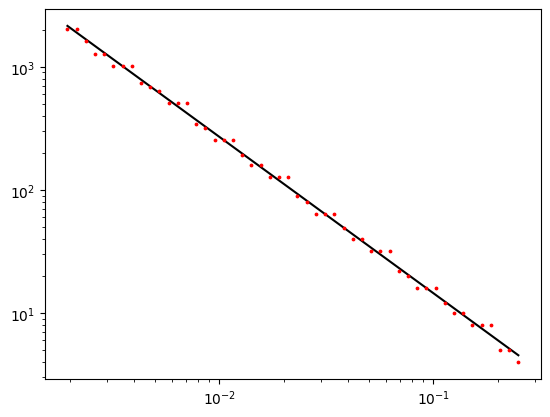

-slope: 1.2704985662304105


In [ ]:
from scipy.stats import linregress

# Measures shape with rulers of size r
def countRulers(pList, r):

  N = 0
  currentPoint = pList[0]

  # Run over points
  for p in pList:

    # When reach point that is r distance away, N++
    if np.linalg.norm(currentPoint - p) >= r:
      N += 1
      currentPoint = p

  return N


# Generates curve
points = koch_lines(8)

# Rulers of decreasing length
rList = np.logspace(-2, -9, num=50, base=2)

NList = []

for r in rList:

  # Amount of rulers for r
  NList.append(countRulers(points, r))

# Plot trend
m, b = np.polyfit(np.log(rList), np.log(NList), 1)
plt.plot(rList, np.exp(m * np.log(rList) + b), color="black", zorder=1)

plt.scatter(rList, NList, s=3, color='red', zorder=2)

plt.loglog()
plt.show()

print("-slope:", -m)

Our analytical reasoning from before lead us to conclude that scaling a ruler by a factor of $r={}\stackrel{1}{}\!\!\unicode{x2215}_{\!\unicode{x202f}3}$ will enlarge the Koch curve by $4$, so we can conclude:

$$$$
$$D = -\frac{\log4}{\log\stackrel{1}{}\!\!\unicode{x2215}_{\!\unicode{x202f}3}}$$
$$$$
$$\approx1.26$$
$$$$
Indicating that the ruler method has lead us to a good approximation, within $\%1$.

We can similarly calculate the Fractal dimension of the Sierpinski triangle, this time counting **boxes** instead of lines.

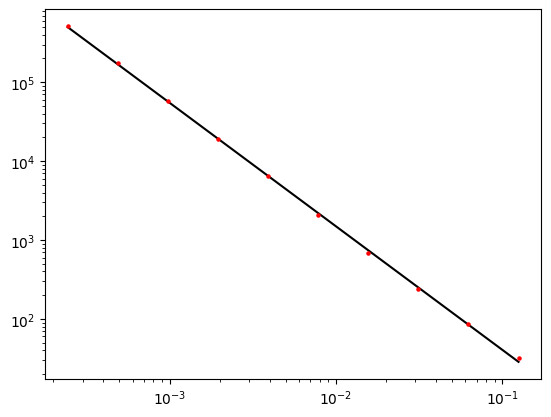

-slope: 1.5663359399221424


In [ ]:
from PIL import Image as pImage
import numpy as np

plt.close()
plt.figure(figsize=(1, 1))
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")




# Draws full-scale triangle
whole_triangle = plt.Polygon(UNIT_TRIANGLE, facecolor="green")
plt.gca().add_patch(whole_triangle)

# Generates holes
holes = sierpinski_holes(9)

# Draws holes
for hole in holes:
  poly = plt.Polygon(hole, facecolor="white")
  plt.gca().add_patch(poly)

# Saves shape with 4096x4096 pixel resolution
plt.savefig('sierpinski.png', dpi=2**13)
plt.close()

# Opens image as pixel array
img = pImage.open('sierpinski.png').convert('RGB')
pWidth, pHeight = img.size
pixelArr = np.array(img)
brightnessArr = np.average(pixelArr, axis=-1)

# 1 if pixel isn't white, else 0
isntWhiteArr = (brightnessArr < 255)


rList = [2**(-n) for n in range(3, 13)]
NList = []

for r in rList:

  boxWidth = int(pWidth*r)
  boxHeight = int(pHeight*r)

  # Reshapes pixel array into smaller matricies of our box size (r x r)
  boxes = isntWhiteArr.reshape(int(1/r), boxHeight, int(1/r), boxWidth).swapaxes(1, 2)

  # Counts how many boxes have at least 1 non-white pixel
  N = np.sum(np.sign(np.sum(boxes, axis=(-1, -2))))

  NList.append(N)

plt.close()

# Plot result

m, b = np.polyfit(np.log(rList), np.log(NList), 1)
plt.plot(rList, np.exp(m * np.log(rList) + b), color="black", zorder=1)

plt.scatter(rList, NList, s=5, color='red', zorder=2)

plt.loglog()
plt.show()

print("-slope:", -m)

Analytically, We can notice that a Sierpinski triangle, scaled down by $\stackrel{1}{}\!\!\unicode{x2215}_{\!\unicode{x202f}2}$ , makes up $\stackrel{1}{}\!\!\unicode{x2215}_{\!\unicode{x202f}3}$ of the original shape, and so:

$$$$
$$D = -\frac{\log3}{\log\stackrel{1}{}\!\!\unicode{x2215}_{\!\unicode{x202f}2}}$$
$$$$
$$\approx1.58$$
$$$$

Meaning the box-counting method has also lead us to a good approximation.

## What is The Coastline of Britain?

We note that the **coastlines of countries** exhibit Fractal behaviour: they have arbitrarily fine details, from the global level, all the way down to the scale of single centimeters.

Therefore, by measuring the coastline of a country with smaller and smaller rulers, we may find that it has a non-integer Fractal dimension.

Let us retrieve the map dataset for the coastline of a country, e.g. Britain:

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


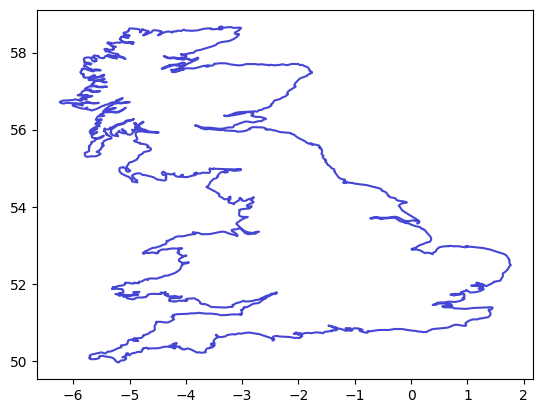

In [ ]:
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
from shapely.geometry import MultiPolygon, Polygon

def getCountryBorder(name):

  # Load the shapefile with country data
  fname = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
  reader = shpreader.Reader(fname)
  records = reader.records()

  # Find the country by name
  geo = None
  for record in records:
      if record.attributes['NAME'] == name:
          geo = record.geometry

  # Extract exterior coordinates
  try:
      border = [np.array(geo.exterior.coords)]
  except:
      border = [np.array(poly.exterior.coords) for poly in geo.geoms]

  # Isolate mainland
  mainlandIndex = max(range(len(border)), key=lambda x: len(border[x]))

  return [border[mainlandIndex]]

# Plot border
def drawBorder(bord, axis=plt):
  for line in bord:
      axis.plot(line[:, 0], line[:, 1], color=np.random.rand(3,).tolist())

NAME = "United Kingdom"
border = getCountryBorder(NAME)

N = len(border)

drawBorder(border)
plt.show()

And let us calculate its Fractal dimension, in the same way we did for the Koch curve — with the **ruler method**.

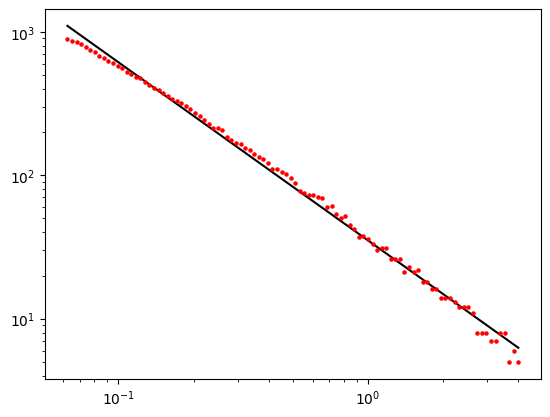

-slope: 1.2424948280074228


In [ ]:
from scipy.stats import linregress

rList = np.logspace(2, -4, num=100, base=2)

NList = []

# Same code as for Koch curve
for r in rList:

  N = 0

  for coast in border:
    N += countRulers(coast, r)

  NList.append(N)

# Plot result
m, b = np.polyfit(np.log(rList), np.log(NList), 1)
plt.plot(rList, np.exp(m * np.log(rList) + b), color="black", zorder=1)

plt.scatter(rList, NList, s=5, color='red', zorder=2)

plt.loglog()
plt.show()

print("-slope:", -m)

We can similarly do this for South Africa, Australia, and Norway:

-----------------
 South Africa 
-----------------


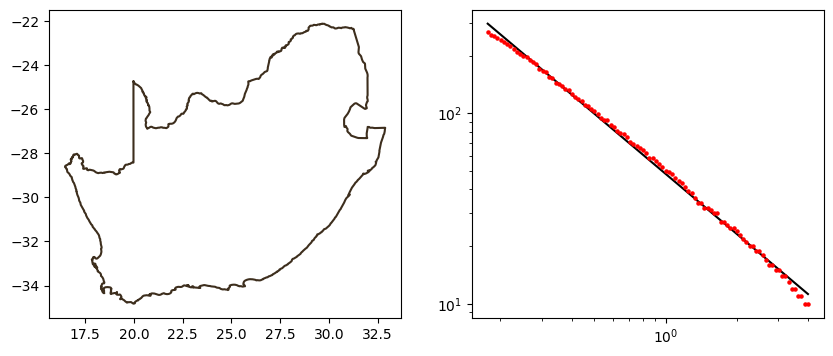

-slope: 1.0486126774953999
-----------------
 Australia 
-----------------


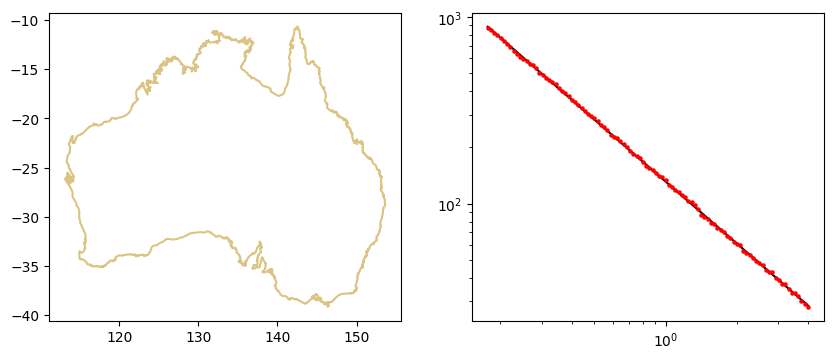

-slope: 1.1031342085293294
-----------------
 Norway 
-----------------


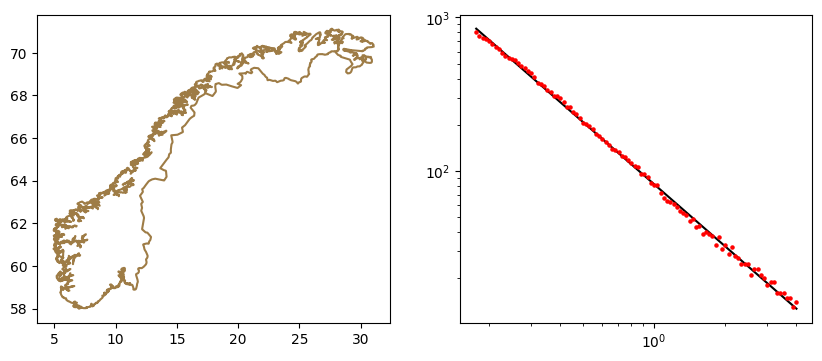

-slope: 1.3454787080858361
-----------------
 Israel 
-----------------


<ipython-input-19-97b2fab03c2f>:35: RuntimeWarning: divide by zero encountered in log
  m, b = np.polyfit(np.log(rList), np.log(NList), 1)


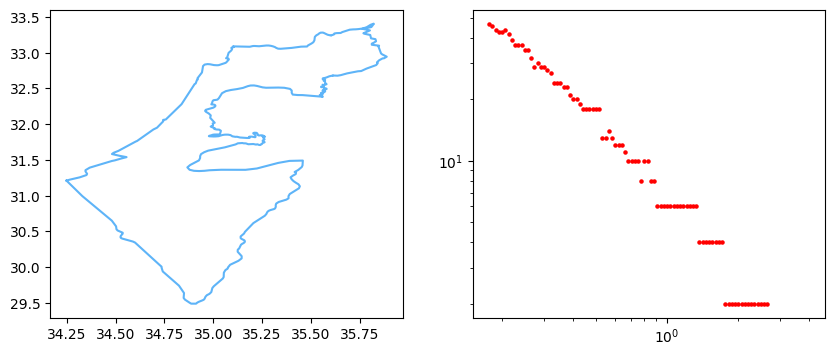

-slope: nan


In [ ]:
plt.rcParams['figure.dpi'] = 100

countries = ["South Africa", "Australia", "Norway", "Israel"]

rList = np.logspace(2, -2.5, num=100, base=2)

# For each of the above countries
for country in countries:

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

  print("-----------------\n", country, "\n-----------------")

  border = getCountryBorder(country)

  N = len(border)

  # Draw it on one plot
  drawBorder(border, ax1)

  NList = []

  # Again measure coastline in r rulers
  for r in rList:

    N = 0

    for coast in border:
      N += countRulers(coast, r)

    NList.append(N)

  # Plot result

  m, b = np.polyfit(np.log(rList), np.log(NList), 1)
  ax2.plot(rList, np.exp(m * np.log(rList) + b), color="black", zorder=1)

  ax2.scatter(rList, NList, s=5, color='red', zorder=2)

  ax2.loglog()
  plt.show()
  print("-slope:", -m)



## Box-Counting For Coastlines

We may also try Box-Counting to measure coastline dimension — Box-Counting is more numerically stable than the Ruler Method, due to the fact that **only an integer number of rulers may be counted** on any given curve.

By contrast, Box-Counting always **captures the shape of the curve at any given box size, without 'rounding'**.

The following is an application of Box-Counting on the Coastline of Norway — by far the most complex coastline we've experimented with.

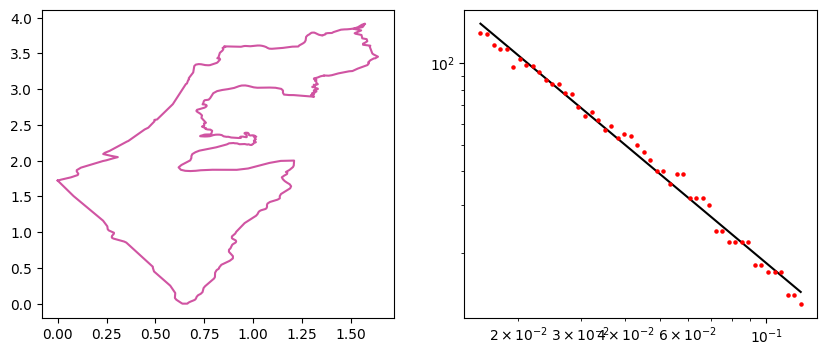

-slope: 1.0952880460198546


In [ ]:
plt.rcParams['figure.dpi'] = 100

powList = np.linspace(3, 6, num=50)
rList = [2**(-n) for n in powList]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

border = np.array(getCountryBorder("Israel")[0])

N = len(border)

# Align border to 0,0
xmin = np.min(border[:, 0])
ymin = np.min(border[:, 1])
border = border - np.array([xmin, ymin])
drawBorder([border], ax1)

# Get image length with some padding
imageLength = np.max(border.ravel())*1.5



NList = []

# Iterate on ruler size
for pow, r in zip(powList, rList):

  # Create grid of 2^pow x 2^pow
  nBoxes = np.ceil(2**pow).astype(int)
  boxArray = np.zeros((nBoxes, nBoxes))

  # For each point, align it to the grid.
  alignToGrid = np.floor(nBoxes*border / imageLength).astype(int)

  # For each grid point, assign it 1 if any points are in it
  for g in alignToGrid:
    boxArray[g[0], g[1]] = 1

  NList.append(np.sum(boxArray))

# Plot result
m, b = np.polyfit(np.log(rList), np.log(NList), 1)
ax2.plot(rList, np.exp(m * np.log(rList) + b), color="black", zorder=1)

ax2.scatter(rList, NList, s=5, color='red', zorder=2)

ax2.loglog()
plt.show()

print("-slope:", -m)

Which clearly shows a much stabler pattern.